# 01. Logistic Regression and Classification Metrics | الانحدار اللوجستي ومقاييس التصنيف

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Unit 1: All examples** - Data processing and regression
- ✅ **Unit 2: All examples** - Advanced regression and cross-validation
- ✅ **Understanding of classification**: Predicting categories (0/1) vs continuous values

**If you haven't completed these**, you might struggle with:
- Understanding the difference between regression and classification
- Knowing which metrics to use for classification
- Understanding probability predictions vs class predictions

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This is Unit 3, Example 1** - it's your first classification model!

**Why this example FIRST in Unit 3?**
- **Before** you can use advanced classification, you need to understand basic classification
- **Before** you can evaluate classification models, you need to know classification metrics
- **Before** you can use complex classifiers, you need to master the simplest one

**Builds on**: 
- 📓 Unit 1, Example 4: Linear Regression (logistic regression is similar but for classification)
- 📓 Unit 2: All examples (evaluation concepts apply here too)

**Leads to**: 
- 📓 Example 2: Decision Trees (more complex classifier)
- 📓 Example 3: SVM (advanced classifier)
- 📓 All classification problems (logistic regression is the foundation!)

**Why this order?**
1. Logistic regression is the **simplest classification model** (easy to understand)
2. Logistic regression teaches **classification metrics** (different from regression!)
3. Logistic regression shows **probability predictions** (important for all classifiers)

---

## The Story: Predicting Categories Instead of Numbers | القصة: التنبؤ بالفئات بدلاً من الأرقام

Imagine you're a doctor. **Before** logistic regression, you can only predict continuous values (like blood pressure). **After** logistic regression, you can predict categories (like "sick" or "healthy") - much more useful for diagnosis!

Same with machine learning: **Before** logistic regression, we only predicted numbers (regression). **After** logistic regression, we can predict categories (classification) - opens up many new applications!

---

## Why Logistic Regression Matters | لماذا يهم الانحدار اللوجستي؟

Logistic regression is the foundation of classification:
- **Simplest Classifier**: Easy to understand and interpret
- **Probability Outputs**: Gives probabilities, not just predictions
- **Fast and Efficient**: Works quickly on large datasets
- **Interpretable**: You can see how features affect class probability
- **Real-World Use**: Used in medicine, finance, marketing, and more

## Learning Objectives | أهداف التعلم
1. Build logistic regression models for binary classification
2. Understand classification metrics (accuracy, precision, recall, F1)
3. Interpret confusion matrices
4. Create and interpret ROC curves
5. Visualize decision boundaries
6. Know when logistic regression is appropriate

In [49]:
# Step 1: Import necessary libraries
# These libraries help us build and evaluate classification models

import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns  # For beautiful plots
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.linear_model import LogisticRegression  # The classification model!
from sklearn.preprocessing import StandardScaler  # For scaling features
from sklearn.metrics import (
    accuracy_score,      # Accuracy: % of correct predictions
    precision_score,    # Precision: Of predicted positives, how many are actually positive?
    recall_score,       # Recall: Of actual positives, how many did we catch?
    f1_score,           # F1: Harmonic mean of precision and recall
    confusion_matrix,   # Shows true/false positives/negatives
    classification_report,  # Comprehensive classification metrics
    roc_curve,         # ROC curve (True Positive Rate vs False Positive Rate)
    roc_auc_score      # AUC: Area under ROC curve (0-1, higher is better)
)

print("✅ Libraries imported successfully!")
print("\n📚 What each classification metric does:")
print("   - Accuracy: Overall correctness")
print("   - Precision: How reliable are positive predictions?")
print("   - Recall: How many positives did we catch?")
print("   - F1: Balance between precision and recall")
print("   - ROC/AUC: How well model separates classes")


✅ Libraries imported successfully!

📚 What each classification metric does:
   - Accuracy: Overall correctness
   - Precision: How reliable are positive predictions?
   - Recall: How many positives did we catch?
   - F1: Balance between precision and recall
   - ROC/AUC: How well model separates classes


## Part 1: Setting the Scene | الجزء الأول: إعداد المشهد

**BEFORE**: We've been doing regression (predicting numbers like prices). Now we need classification (predicting categories like "sick" or "healthy").

**AFTER**: We'll build logistic regression - a classification model that predicts probabilities and categories!

**Why this matters**: Many real-world problems are classification (spam/not spam, fraud/not fraud, sick/healthy). Logistic regression is the foundation!

---

## Step 1: Load Real-World Binary Classification Data | الخطوة 1: تحميل بيانات تصنيف ثنائية من العالم الحقيقي

**BEFORE**: We need to learn classification, but we need real binary classification data (two classes: 0 and 1).

**AFTER**: We'll load the Breast Cancer Wisconsin dataset - real medical data for binary classification (benign vs malignant tumors)!

**Why Breast Cancer dataset?** This is REAL medical data from the University of Wisconsin. It's perfect for learning binary classification because it has:
- Clear binary classes: Benign (0) vs Malignant (1) tumors
- Multiple features: 30 features from cell measurements
- Real-world importance: Medical diagnosis application
- Well-studied dataset: Standard benchmark for classification algorithms


In [50]:
# Load real-world Breast Cancer Wisconsin dataset
# This is REAL medical data for binary classification
# Binary classification = predicting one of two classes (0 = benign, 1 = malignant)

from sklearn.datasets import load_breast_cancer

print("\n📥 Loading Breast Cancer Wisconsin dataset...")
print("تحميل مجموعة بيانات سرطان الثدي من ويسكونسن...")

cancer_data = load_breast_cancer()

# Create DataFrame
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
df['target'] = cancer_data.target

# Note: In this dataset, 0 = Malignant, 1 = Benign
# We'll keep it as is for consistency with sklearn conventions

print(f"\n✅ Real-world Breast Cancer dataset loaded!")
print(f"   📊 This is REAL medical data from University of Wisconsin")
print(f"   📈 Contains {len(df)} samples with {len(df.columns)-1} features")
print(f"   🎯 Target: Binary classification (0 = Malignant, 1 = Benign)")
print(f"\n🔍 Notice:")
print("   - This is REAL medical diagnosis data")
print("   - Features are measurements from cell nuclei (radius, texture, etc.)")
print("   - Perfect for learning binary classification!")



📥 Loading Breast Cancer Wisconsin dataset...
تحميل مجموعة بيانات سرطان الثدي من ويسكونسن...

✅ Real-world Breast Cancer dataset loaded!
   📊 This is REAL medical data from University of Wisconsin
   📈 Contains 569 samples with 30 features
   🎯 Target: Binary classification (0 = Malignant, 1 = Benign)

🔍 Notice:
   - This is REAL medical diagnosis data
   - Features are measurements from cell nuclei (radius, texture, etc.)
   - Perfect for learning binary classification!


## Step 1: Prepare Data for Modeling | الخطوة 1: إعداد البيانات للنمذجة

**BEFORE**: We have the Breast Cancer dataset loaded, but we need to extract features (X) and target (y) for modeling.

**AFTER**: We'll extract features and target, then prepare them for training!

**Why this step?** Models need features (X) and target (y) as separate arrays. We'll create both 2D features (for visualization) and all features (for modeling)!


In [51]:
# Prepare features (X) and target (y) from the loaded data
# Extract features and target from DataFrame
# We create two feature sets:
# - X_2d: 2 features for 2D visualization (easier to see decision boundaries)
# - X_all: All 30 features for actual modeling (better performance)

feature_1_name = 'mean radius'   # First feature for 2D visualization
feature_2_name = 'mean texture'  # Second feature for 2D visualization

X_2d = df[[feature_1_name, feature_2_name]].values  # 2 features for visualization
X_all = df[cancer_data.feature_names].values  # All 30 features for modeling
y = df['target'].values  # Target: 0 = Malignant, 1 = Benign

print(f"\n✅ Data prepared for modeling:")
print(f"   X_2d (for visualization): {X_2d.shape[1]} features")
print(f"   X_all (for modeling): {X_all.shape[1]} features")
print(f"   Target (y): {len(y)} samples")
print(f"   Features: {', '.join(cancer_data.feature_names[:4])}... and more")


✅ Data prepared for modeling:
   X_2d (for visualization): 2 features
   X_all (for modeling): 30 features
   Target (y): 569 samples
   Features: mean radius, mean texture, mean perimeter, mean area... and more


In [52]:
# Data summary and exploration
# Show what we've prepared for modeling
print(f"\n📊 Real Data Summary:")
print(f"   Shape: {df.shape}")
print(f"   Features: {len(cancer_data.feature_names)} cell measurements")
print(f"   Target: Binary (0 = Malignant, 1 = Benign)")
print(f"\n📄 First 5 rows (showing first 5 features):")
print(df.iloc[:, :6].head())  # Show first 5 features + target
print(f"\n📊 Target distribution:")
print(df['target'].value_counts())
print(f"   - Class 0 (Malignant): {(df['target']==0).sum()} samples")
print(f"   - Class 1 (Benign): {(df['target']==1).sum()} samples")
print("\n🔍 Notice:")
print("   - This is REAL medical diagnosis data from Wisconsin")
print("   - Features are measurements from cell nuclei")
print("   - Binary classification: Malignant vs Benign tumors")
print("   - Perfect for learning logistic regression!")


📊 Real Data Summary:
   Shape: (569, 31)
   Features: 30 cell measurements
   Target: Binary (0 = Malignant, 1 = Benign)

📄 First 5 rows (showing first 5 features):
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  
0           0.27760  
1           0.07864  
2           0.15990  
3           0.28390  
4           0.13280  

📊 Target distribution:
target
1    357
0    212
Name: count, dtype: int64
   - Class 0 (Malignant): 212 samples
   - Class 1 (Benign): 357 samples

🔍 Notice:
   - This is REAL medical diagnosis data from Wisconsin
   - Features are measurements

In [53]:
# Split data
# Use X_all (all 30 features) for training - better performance than just 2 features!
# X_2d was only for visualization - we use all features for the actual model
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y, test_size=0.2, random_state=42, stratify=y
)
# train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# - Splits data into training and testing sets
# - X: Features (input variables), y: Target (output variable)
# - test_size=0.2: 20% for testing, 80% for training
# - random_state=42: Seed for reproducibility (same split every time)
# - stratify=y: Maintains class distribution in train/test (for classification)
# - Returns: X_train, X_test, y_train, y_test

In [54]:
# Scale features
scaler = StandardScaler()
# .fit_transform(data)
# - Two operations in one: .fit() then .transform()
#   1. .fit(): Learns parameters from data (mean/std, categories, etc.)
#   2. .transform(): Applies transformation using learned parameters
# - Use on training data
# - For test data, use only .transform() (don't refit!)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
print("\n" + "=" * 60)
print("1. Training Logistic Regression Model")
print("تدريب نموذج الانحدار اللوجستي")
print("=" * 60)

# Create and train logistic regression model
# max_iter=1000: Allow more iterations for convergence
# random_state=42: For reproducibility
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

print("   ✅ Model trained successfully!")
print("   Logistic regression learned to predict class probabilities")



1. Training Logistic Regression Model
تدريب نموذج الانحدار اللوجستي
   ✅ Model trained successfully!
   Logistic regression learned to predict class probabilities


## Step 2: Train Logistic Regression Model | الخطوة 2: تدريب نموذج الانحدار اللوجستي

**BEFORE**: We have binary classification data, but no model to predict classes.

**AFTER**: We'll train logistic regression to predict probabilities and classes!

**Why logistic regression?**
- **Similar to linear regression**: But outputs probabilities (0-1) instead of continuous values
- **Sigmoid function**: Squashes output to [0,1] range (probabilities)
- **Interpretable**: Coefficients show how features affect class probability
- **Fast**: Works quickly even on large datasets

In [56]:
# Make class predictions (0 or 1)
# .predict() returns the predicted class (0 or 1)
# Uses threshold of 0.5: if probability > 0.5, predict class 1, else class 0
y_train_pred = logistic_model.predict(X_train_scaled)
y_test_pred = logistic_model.predict(X_test_scaled)

print(f"   ✅ Class predictions made!")
print(f"   Training predictions: {len(y_train_pred)}")
print(f"   Test predictions: {len(y_test_pred)}")

   ✅ Class predictions made!
   Training predictions: 455
   Test predictions: 114


In [57]:
# Get probability predictions (more informative than class predictions!)
# .predict_proba() returns probabilities for each class
# [:, 1] gets probability of class 1 (the positive class)
# Why probabilities? They tell us how confident the model is!
y_train_proba = logistic_model.predict_proba(X_train_scaled)[:, 1]
y_test_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]

print("\n📊 Model Parameters:")
print(f"   Coefficients: {logistic_model.coef_[0]}")
print(f"   Intercept: {logistic_model.intercept_[0]:.4f}")
print(f"\n   Interpretation:")
print(f"   - Coefficients show how features affect class 1 probability")
print(f"   - Positive coefficient → increases probability of class 1")
print(f"   - Negative coefficient → decreases probability of class 1")


📊 Model Parameters:
   Coefficients: [-0.50506975 -0.55873422 -0.47140795 -0.53873734 -0.20771839  0.65362708
 -0.60657859 -0.70001318 -0.17298559  0.19360875 -1.08427851  0.25114768
 -0.5372148  -0.93489448 -0.15813328  0.64272374  0.17128749 -0.44708449
  0.35878449  0.43561586 -0.9451252  -1.24833214 -0.76142429 -0.95370642
 -0.75297843  0.04381431 -0.82886055 -0.94845784 -0.9352194  -0.17203651]
   Intercept: 0.3005

   Interpretation:
   - Coefficients show how features affect class 1 probability
   - Positive coefficient → increases probability of class 1
   - Negative coefficient → decreases probability of class 1


In [58]:
print("\n" + "=" * 60)
print("2. Evaluation Metrics")
print("مقاييس التقييم")
print("=" * 60)



2. Evaluation Metrics
مقاييس التقييم


## Step 3: Classification Evaluation Metrics | الخطوة 3: مقاييس تقييم التصنيف

**BEFORE**: We used MSE and R² for regression. Classification needs different metrics!

**AFTER**: We'll use classification metrics (accuracy, precision, recall, F1) that measure classification performance!

**Why different metrics?**
- **Regression**: Predicts numbers → use MSE, R²
- **Classification**: Predicts categories → use accuracy, precision, recall, F1
- **Each metric tells us something different**: Accuracy (overall), Precision (reliability), Recall (coverage), F1 (balance)

**Common Student Questions:**
- **Q: Why not just use accuracy?**
  - Answer: Accuracy can be misleading with imbalanced data!
  - Example: 99% negative, 1% positive → model predicts all negative = 99% accuracy (but useless!)
  - Solution: Use precision/recall to see performance on each class separately
- **Q: What's the difference between precision and recall?**
  - Answer: Precision = "Of what I predicted positive, how many were correct?"
  - Recall = "Of all actual positives, how many did I catch?"
  - Example: Medical test with high precision = few false alarms, high recall = catches most diseases
- **Q: Why F1 score? Why not just precision or recall?**
  - Answer: F1 balances precision and recall (harmonic mean)
  - Problem: High precision but low recall = misses many cases, high recall but low precision = many false alarms
  - Solution: F1 finds balance - good F1 = both precision and recall are decent
- **Q: When should I focus on precision vs recall?**
  - Answer: Depends on cost of errors:
  - High precision needed: Spam detection (few false positives = don't block real emails)
  - High recall needed: Disease detection (catch all diseases, even if some false alarms)
  - Balanced: Use F1 score

In [59]:
# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [60]:
# Precision
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

In [61]:
# Recall
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

In [62]:
# F1 Score
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
print("\nTraining Metrics:")
print(f"  Accuracy:  {train_accuracy:.4f}")
print(f"  Precision: {train_precision:.4f}")
print(f"  Recall:    {train_recall:.4f}")
print(f"  F1 Score:  {train_f1:.4f}")
print("\nTest Metrics:")
print(f"  Accuracy:  {test_accuracy:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  Recall:    {test_recall:.4f}")
print(f"  F1 Score:  {test_f1:.4f}")

# Add interpretation
print("\n" + "=" * 60)
print("💡 Interpreting the Metrics | تفسير المقاييس")
print("=" * 60)
print(f"\n📊 Accuracy ({test_accuracy:.2%}):")
print(f"   - The model correctly predicts {test_accuracy:.2%} of all cases")
print(f"   - {'✅ Excellent!' if test_accuracy > 0.9 else '✅ Good!' if test_accuracy > 0.8 else '⚠️  Room for improvement'}")
print(f"   - This is the overall correctness of the model")

print(f"\n📊 Precision ({test_precision:.2%}):")
print(f"   - Of all cases predicted as Class 1, {test_precision:.2%} are actually Class 1")
print(f"   - {'✅ High precision' if test_precision > 0.9 else '✅ Good precision' if test_precision > 0.8 else '⚠️  Low precision'}")
print(f"   - High precision = few false positives (reliable positive predictions)")

print(f"\n📊 Recall ({test_recall:.2%}):")
print(f"   - The model catches {test_recall:.2%} of all actual Class 1 cases")
print(f"   - {'✅ High recall' if test_recall > 0.9 else '✅ Good recall' if test_recall > 0.8 else '⚠️  Low recall'}")
print(f"   - High recall = few false negatives (catches most positives)")

print(f"\n📊 F1 Score ({test_f1:.2%}):")
print(f"   - Harmonic mean of precision and recall: {test_f1:.2%}")
print(f"   - {'✅ Excellent balance' if test_f1 > 0.9 else '✅ Good balance' if test_f1 > 0.8 else '⚠️  Imbalanced'}")
print(f"   - Balances precision and recall (useful when classes are imbalanced)")

print(f"\n🔍 What to Notice:")
if test_precision > test_recall:
    print(f"   - Precision ({test_precision:.2%}) > Recall ({test_recall:.2%})")
    print(f"   - Model is CONSERVATIVE: careful about predicting Class 1")
    print(f"   - Fewer false positives, but may miss some actual positives")
elif test_recall > test_precision:
    print(f"   - Recall ({test_recall:.2%}) > Precision ({test_precision:.2%})")
    print(f"   - Model is AGGRESSIVE: catches most positives")
    print(f"   - Fewer false negatives, but may have more false positives")
else:
    print(f"   - Precision and Recall are balanced")
    print(f"   - Model has good balance between catching positives and being reliable")

print(f"\n📚 What This Teaches Us:")
print(f"   - Accuracy alone isn't enough - need precision and recall too")
print(f"   - Precision vs Recall trade-off: can't maximize both simultaneously")
print(f"   - F1 score helps balance this trade-off")
print(f"   - Compare train vs test: train accuracy {train_accuracy:.2%} vs test {test_accuracy:.2%}")
if abs(train_accuracy - test_accuracy) > 0.05:
    print(f"   - ⚠️  Large gap suggests possible overfitting!")
else:
    print(f"   - ✅ Similar performance suggests good generalization")


Training Metrics:
  Accuracy:  0.9890
  Precision: 0.9861
  Recall:    0.9965
  F1 Score:  0.9913

Test Metrics:
  Accuracy:  0.9825
  Precision: 0.9861
  Recall:    0.9861
  F1 Score:  0.9861

💡 Interpreting the Metrics | تفسير المقاييس

📊 Accuracy (98.25%):
   - The model correctly predicts 98.25% of all cases
   - ✅ Excellent!
   - This is the overall correctness of the model

📊 Precision (98.61%):
   - Of all cases predicted as Class 1, 98.61% are actually Class 1
   - ✅ High precision
   - High precision = few false positives (reliable positive predictions)

📊 Recall (98.61%):
   - The model catches 98.61% of all actual Class 1 cases
   - ✅ High recall
   - High recall = few false negatives (catches most positives)

📊 F1 Score (98.61%):
   - Harmonic mean of precision and recall: 98.61%
   - ✅ Excellent balance
   - Balances precision and recall (useful when classes are imbalanced)

🔍 What to Notice:
   - Precision and Recall are balanced
   - Model has good balance between catch

In [63]:
print("\n" + "=" * 60)
print("3. Confusion Matrix")
print("مصفوفة الارتباك")
print("=" * 60)

# Create confusion matrix
# Shows: True Negatives, False Positives, False Negatives, True Positives
cm = confusion_matrix(y_test, y_test_pred)

print("\n📊 Confusion Matrix:")
print("   Format: [TN  FP]")
print("          [FN  TP]")
print(cm)
print("\n💡 Understanding:")
print("   - TN (True Negative): Correctly predicted class 0")
print("   - FP (False Positive): Predicted 1, but actually 0 (Type I error)")
print("   - FN (False Negative): Predicted 0, but actually 1 (Type II error)")
print("   - TP (True Positive): Correctly predicted class 1")

# Extract values for interpretation
tn, fp, fn, tp = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]
total = tn + fp + fn + tp

print("\n" + "=" * 60)
print("💡 Interpreting the Confusion Matrix | تفسير مصفوفة الارتباك")
print("=" * 60)
print(f"\n📊 Breakdown:")
print(f"   - True Negatives (TN): {tn} - Correctly predicted Class 0")
print(f"   - False Positives (FP): {fp} - Predicted Class 1, but actually Class 0")
print(f"   - False Negatives (FN): {fn} - Predicted Class 0, but actually Class 1")
print(f"   - True Positives (TP): {tp} - Correctly predicted Class 1")
print(f"   - Total: {total} test samples")

print(f"\n🔍 Error Analysis:")
print(f"   - Total errors: {fp + fn} out of {total} ({((fp+fn)/total):.1%})")
print(f"   - False Positives: {fp} ({fp/total:.1%}) - Model predicted Class 1 when it should be Class 0")
print(f"   - False Negatives: {fn} ({fn/total:.1%}) - Model predicted Class 0 when it should be Class 1")

if fp > fn:
    print(f"   - ⚠️  More False Positives ({fp}) than False Negatives ({fn})")
    print(f"   - Model is too aggressive in predicting Class 1")
elif fn > fp:
    print(f"   - ⚠️  More False Negatives ({fn}) than False Positives ({fp})")
    print(f"   - Model is too conservative, missing Class 1 cases")
else:
    print(f"   - ✅ Balanced errors: {fp} FP and {fn} FN")

print(f"\n📚 What This Teaches Us:")
print(f"   - Confusion matrix shows WHERE errors occur (which class)")
print(f"   - Helps identify if model has bias toward one class")
print(f"   - FP and FN have different costs in real-world applications")
print(f"   - Example: In medical diagnosis, FN (missing disease) is worse than FP (false alarm)")
print(f"   - Can calculate precision, recall, and F1 from these numbers")



3. Confusion Matrix
مصفوفة الارتباك

📊 Confusion Matrix:
   Format: [TN  FP]
          [FN  TP]
[[41  1]
 [ 1 71]]

💡 Understanding:
   - TN (True Negative): Correctly predicted class 0
   - FP (False Positive): Predicted 1, but actually 0 (Type I error)
   - FN (False Negative): Predicted 0, but actually 1 (Type II error)
   - TP (True Positive): Correctly predicted class 1

💡 Interpreting the Confusion Matrix | تفسير مصفوفة الارتباك

📊 Breakdown:
   - True Negatives (TN): 41 - Correctly predicted Class 0
   - False Positives (FP): 1 - Predicted Class 1, but actually Class 0
   - False Negatives (FN): 1 - Predicted Class 0, but actually Class 1
   - True Positives (TP): 71 - Correctly predicted Class 1
   - Total: 114 test samples

🔍 Error Analysis:
   - Total errors: 2 out of 114 (1.8%)
   - False Positives: 1 (0.9%) - Model predicted Class 1 when it should be Class 0
   - False Negatives: 1 (0.9%) - Model predicted Class 0 when it should be Class 1
   - ✅ Balanced errors: 1 FP and 

In [64]:
# Classification Report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred,
                          target_names=['Class 0', 'Class 1']))

# Add interpretation
print("\n" + "=" * 60)
print("💡 Reading the Classification Report | قراءة تقرير التصنيف")
print("=" * 60)
print("\n📊 Understanding Each Column:")
print("   - Precision: Of predictions for this class, how many were correct?")
print("   - Recall: Of actual cases of this class, how many did we catch?")
print("   - F1-score: Balance between precision and recall")
print("   - Support: Number of actual cases of this class in test set")

print("\n🔍 What to Look For:")
print("   - Compare Class 0 vs Class 1 metrics (check for class imbalance)")
print("   - High precision = reliable predictions for that class")
print("   - High recall = catches most cases of that class")
print("   - F1-score shows overall performance for each class")

print("\n📚 Key Insights:")
# Calculate class distribution
class_0_count = (y_test == 0).sum()
class_1_count = (y_test == 1).sum()
total = len(y_test)
print(f"   - Class distribution: {class_0_count}/{total} ({(class_0_count/total):.1%}) Class 0, {class_1_count}/{total} ({(class_1_count/total):.1%}) Class 1")
if abs(class_0_count - class_1_count) / total > 0.2:
    print(f"   - ⚠️  Class imbalance detected! This affects model performance")
    print(f"   - Model may favor the majority class")
else:
    print(f"   - ✅ Classes are relatively balanced")

print("\n💡 Learning Point:")
print("   - Classification report shows per-class performance")
print("   - Important when classes are imbalanced (one class has more samples)")
print("   - Accuracy can be misleading with imbalanced classes!")
print("   - Always check precision and recall for each class separately")


Classification Report (Test Set):
              precision    recall  f1-score   support

     Class 0       0.98      0.98      0.98        42
     Class 1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


💡 Reading the Classification Report | قراءة تقرير التصنيف

📊 Understanding Each Column:
   - Precision: Of predictions for this class, how many were correct?
   - Recall: Of actual cases of this class, how many did we catch?
   - F1-score: Balance between precision and recall
   - Support: Number of actual cases of this class in test set

🔍 What to Look For:
   - Compare Class 0 vs Class 1 metrics (check for class imbalance)
   - High precision = reliable predictions for that class
   - High recall = catches most cases of that class
   - F1-score shows overall performance for each class

📚 Key Insights:
   - Class distribution: 4

In [65]:
print("\n" + "=" * 60)
print("4. ROC Curve and AUC")
print("منحنى ROC و AUC")
print("=" * 60)



4. ROC Curve and AUC
منحنى ROC و AUC



✓ Plot saved as 'confusion_matrix.png'


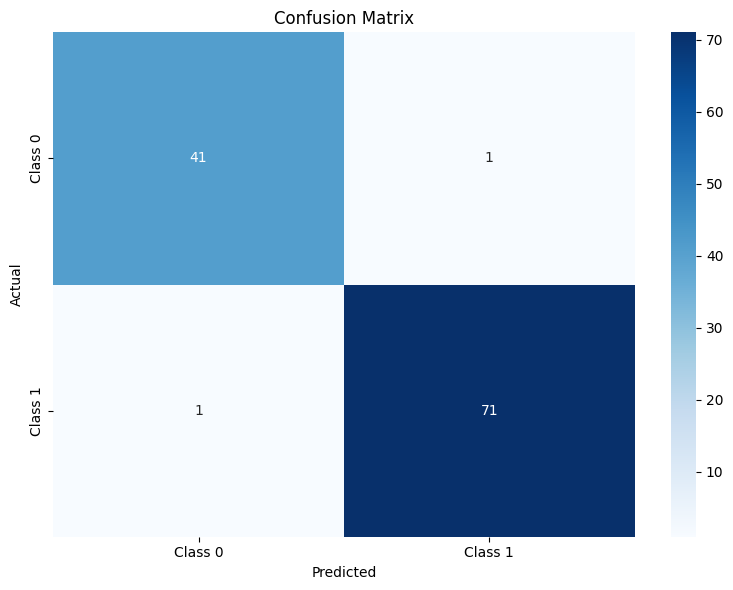

In [66]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'confusion_matrix.png'")
plt.show()

In [67]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
auc_score = roc_auc_score(y_test, y_test_proba)
print(f"\nAUC Score: {auc_score:.4f}")

# Add interpretation
print("\n" + "=" * 60)
print("💡 Understanding AUC Score | فهم درجة AUC")
print("=" * 60)
print(f"\n📊 AUC (Area Under Curve) = {auc_score:.4f}")
print(f"   - Range: 0.0 to 1.0")
print(f"   - 0.5 = Random guessing (worst)")
print(f"   - 1.0 = Perfect classifier (best)")
print(f"   - Our score: {auc_score:.4f} ({auc_score*100:.1f}%)")

if auc_score >= 0.9:
    print(f"   - ✅ EXCELLENT! (>0.9 means model can distinguish classes very well)")
elif auc_score >= 0.8:
    print(f"   - ✅ GOOD! (>0.8 means model has good discriminative ability)")
elif auc_score >= 0.7:
    print(f"   - ⚠️  FAIR (>0.7 means model has some ability, but room for improvement)")
elif auc_score >= 0.6:
    print(f"   - ⚠️  POOR (>0.6 but <0.7 means model struggles to separate classes)")
else:
    print(f"   - ❌ VERY POOR (<0.6 means model is barely better than random)")

print(f"\n🔍 What AUC Measures:")
print(f"   - How well the model can distinguish between Class 0 and Class 1")
print(f"   - Higher AUC = better at separating the two classes")
print(f"   - AUC is independent of the classification threshold")
print(f"   - Useful for comparing different models")

print(f"\n📚 What This Teaches Us:")
print(f"   - AUC evaluates model performance across all possible thresholds")
print(f"   - Unlike accuracy, AUC doesn't depend on a fixed threshold (0.5)")
print(f"   - AUC is especially useful when classes are imbalanced")
print(f"   - AUC > 0.8 is generally considered good for binary classification")
print(f"   - Our model has {'excellent' if auc_score >= 0.9 else 'good' if auc_score >= 0.8 else 'fair'} ability to separate classes")


AUC Score: 0.9954

💡 Understanding AUC Score | فهم درجة AUC

📊 AUC (Area Under Curve) = 0.9954
   - Range: 0.0 to 1.0
   - 0.5 = Random guessing (worst)
   - 1.0 = Perfect classifier (best)
   - Our score: 0.9954 (99.5%)
   - ✅ EXCELLENT! (>0.9 means model can distinguish classes very well)

🔍 What AUC Measures:
   - How well the model can distinguish between Class 0 and Class 1
   - Higher AUC = better at separating the two classes
   - AUC is independent of the classification threshold
   - Useful for comparing different models

📚 What This Teaches Us:
   - AUC evaluates model performance across all possible thresholds
   - Unlike accuracy, AUC doesn't depend on a fixed threshold (0.5)
   - AUC is especially useful when classes are imbalanced
   - AUC > 0.8 is generally considered good for binary classification
   - Our model has excellent ability to separate classes



✓ Plot saved as 'roc_curve.png'


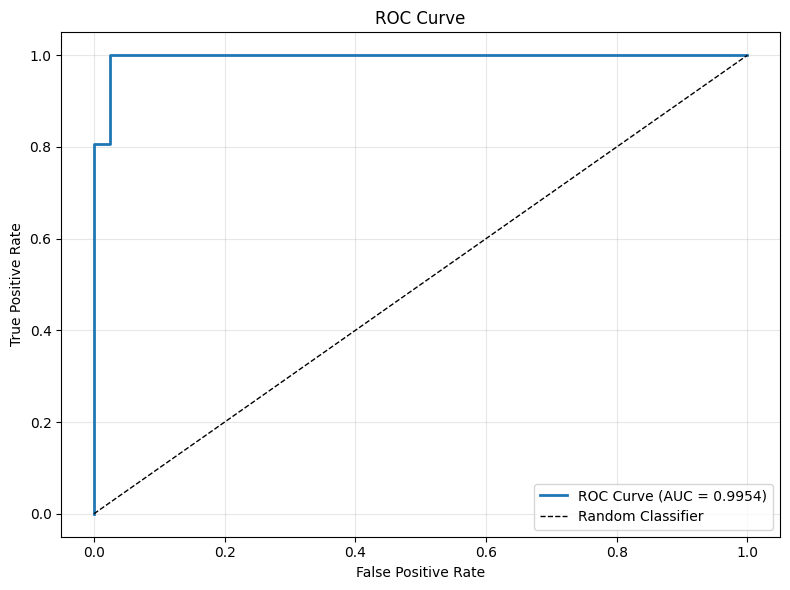

In [68]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'roc_curve.png'")
plt.show()

In [69]:
# 5. Decision Boundary Visualization
print("\n" + "=" * 60)
print("5. Decision Boundary Visualization")
print("تصور حدود القرار")
print("=" * 60)


5. Decision Boundary Visualization
تصور حدود القرار


In [70]:
# For decision boundary visualization, we need to train a separate model
# on just 2 features (X_2d) so we can visualize in 2D
# The main model uses all 30 features, but we can't visualize 30D!

# Prepare 2D features for visualization
X_2d_train, X_2d_test, y_train_2d, y_test_2d = train_test_split(
    X_2d, y, test_size=0.2, random_state=42, stratify=y
)

# Scale the 2D features
scaler_2d = StandardScaler()
X_2d_train_scaled = scaler_2d.fit_transform(X_2d_train)
X_2d_test_scaled = scaler_2d.transform(X_2d_test)

# Train a separate logistic regression model on 2D features for visualization
model_2d = LogisticRegression(random_state=42, max_iter=1000)
model_2d.fit(X_2d_train_scaled, y_train_2d)

print("✅ 2D model trained for visualization")
print("   Note: This is separate from the main model (which uses all 30 features)")
print("   This allows us to visualize the decision boundary in 2D!")

# Create a mesh for plotting
h = 0.02
x_min, x_max = X_2d_test_scaled[:, 0].min() - 1, X_2d_test_scaled[:, 0].max() + 1
y_min, y_max = X_2d_test_scaled[:, 1].min() - 1, X_2d_test_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

✅ 2D model trained for visualization
   Note: This is separate from the main model (which uses all 30 features)
   This allows us to visualize the decision boundary in 2D!


In [71]:
# Predict for mesh points using the 2D model
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

## Step 7: Decision Framework - When to Use Logistic Regression | الخطوة 7: إطار القرار - متى تستخدم الانحدار اللوجستي

**BEFORE**: You've learned how to build logistic regression models, but when should you use them?

**AFTER**: You'll have a clear decision framework to determine if logistic regression is the right choice for your classification problem!

**Why this matters**: Using logistic regression when it's not appropriate leads to:
- **Poor predictions** → Model can't capture complex patterns
- **Wasted time** → Trying to force linear boundaries that don't exist
- **Wrong classifier** → Better alternatives available for your problem

---

### 🎯 Decision Framework: Is Logistic Regression Appropriate? | إطار القرار: هل الانحدار اللوجستي مناسب؟

**Key Question**: Should I use **LOGISTIC REGRESSION** or a different classifier?

#### Decision Tree:

```
What type of problem do you have?
├─ REGRESSION (predicting numbers) → Use REGRESSION methods ❌
│   └─ Why? Logistic regression is for classification, not regression
│
└─ CLASSIFICATION (predicting categories) → Check data characteristics:
    ├─ Linear decision boundary? → Use LOGISTIC REGRESSION ✅
    │   └─ Why? Logistic regression assumes linear boundaries
    │
    ├─ Need interpretability? → Use LOGISTIC REGRESSION ✅
    │   └─ Why? Coefficients show feature importance
    │
    ├─ Small dataset? → Use LOGISTIC REGRESSION ✅
    │   └─ Why? Works well with limited data
    │
    └─ Non-linear boundary needed? → Use OTHER METHODS ⚠️
        └─ Use: Decision Trees, SVM, Random Forest
```

#### Detailed Decision Process:

```
Step 1: Problem Type
├─ Regression → ❌ NOT APPROPRIATE
│   └─ Use: Linear Regression, Polynomial Regression
│
└─ Classification → Continue to Step 2

Step 2: Decision Boundary Type
├─ Linear boundary (can separate with straight line) → ✅ LOGISTIC REGRESSION
│   └─ Why? Logistic regression assumes linear boundaries
│
└─ Non-linear boundary (needs curves) → ⚠️ MAY NOT BE APPROPRIATE
    ├─ Slightly non-linear → Try Logistic Regression with polynomial features
    └─ Highly non-linear → Use Decision Trees, SVM, Random Forest

Step 3: Data Characteristics
├─ Need interpretability? → ✅ LOGISTIC REGRESSION
│   └─ Why? Coefficients show feature importance
│
├─ Small dataset (< 1000)? → ✅ LOGISTIC REGRESSION
│   └─ Why? Works well with limited data
│
├─ Many features (> 50)? → ⚠️ MAY NEED REGULARIZATION
│   └─ Use: Logistic Regression with L1/L2 regularization
│
└─ Imbalanced classes? → ⚠️ MAY NEED SPECIAL HANDLING
    └─ Use: Logistic Regression with class_weight parameter
```

---

### 📊 Comparison Table: Logistic Regression vs Alternatives | جدول المقارنة

| Method | When to Use | Pros | Cons | Example |
|--------|-------------|------|------|---------|
| **Logistic Regression** | Linear boundaries, interpretable, small data | • Interpretable<br>• Fast<br>• Probability outputs<br>• Works with small data | • Assumes linearity<br>• Can't handle non-linear<br>• Requires feature scaling | Binary classification, linear patterns |
| **Decision Trees** | Non-linear, interpretable, no scaling needed | • Handles non-linear<br>• Interpretable<br>• No scaling needed | • Can overfit<br>• Less stable | Complex patterns, feature importance |
| **Random Forest** | Non-linear, robust, many features | • Handles non-linear<br>• Robust<br>• Feature importance | • Less interpretable<br>• More complex | Complex patterns, many features |
| **SVM** | Non-linear (with kernels), optimal margin | • Optimal margin<br>• Handles non-linear (kernels)<br>• Strong performance | • Less interpretable<br>• Requires scaling<br>• Slower | Complex boundaries, optimal separation |
| **XGBoost** | Best performance, complex patterns | • State-of-the-art<br>• Handles complexity | • Less interpretable<br>• Complex | Competition-level performance |

---

### ✅ When Logistic Regression IS Appropriate | متى يكون الانحدار اللوجستي مناسبًا

**Use Logistic Regression when:**

1. **Linear Decision Boundary** ✅
   - Classes can be separated with a straight line (or hyperplane)
   - Scatter plot shows linear separation
   - **Example**: Spam detection (linear relationship between features and spam)

2. **Interpretability Important** ✅
   - Need to understand which features matter
   - Need coefficient interpretation
   - **Example**: Medical diagnosis (need to explain decisions)

3. **Probability Outputs Needed** ✅
   - Need probability scores, not just predictions
   - Need to rank predictions by confidence
   - **Example**: Risk assessment (need probability of default)

4. **Small to Medium Dataset** ✅
   - Less than 10,000 samples
   - Works well with limited data
   - **Example**: Medical studies with limited patients

5. **Baseline Classifier** ✅
   - Start with logistic regression as baseline
   - Compare with more complex models
   - **Example**: Initial model for any classification problem

6. **Fast Predictions Needed** ✅
   - Simple model, fast training and prediction
   - Good for real-time systems
   - **Example**: Real-time fraud detection

---

### ❌ When Logistic Regression IS NOT Appropriate | متى لا يكون الانحدار اللوجستي مناسبًا

**Don't use Logistic Regression when:**

1. **Non-Linear Decision Boundary** ❌
   - Classes need curves or complex boundaries
   - Linear boundary can't separate classes well
   - **Use Instead**: Decision Trees, SVM (with RBF kernel), Random Forest

2. **Regression Problem** ❌
   - Predicting continuous values, not categories
   - **Use Instead**: Linear Regression, Polynomial Regression

3. **Highly Complex Patterns** ❌
   - Multiple interactions, complex relationships
   - **Use Instead**: Random Forest, XGBoost, Neural Networks

4. **Many Features with Non-Linear Relationships** ❌
   - 50+ features with complex interactions
   - **Use Instead**: Random Forest, XGBoost

5. **Image/Text Classification** ❌
   - High-dimensional, complex patterns
   - **Use Instead**: Neural Networks, Random Forest, XGBoost

---

### 📊 Real-World Examples | أمثلة من العالم الحقيقي

#### Example 1: Email Spam Detection ✅ APPROPRIATE
- **Problem**: Classify emails as spam/not spam
- **Boundary**: Linear (word frequencies linearly related to spam)
- **Interpretability**: Important (need to explain why email is spam)
- **Decision**: ✅ Use Logistic Regression
- **Reasoning**: Linear boundary, interpretability important, probability outputs useful

#### Example 2: Customer Churn Prediction ✅ APPROPRIATE
- **Problem**: Predict if customer will leave (churn/not churn)
- **Boundary**: Likely linear (customer features linearly related to churn)
- **Interpretability**: Important (need to understand churn factors)
- **Decision**: ✅ Use Logistic Regression
- **Reasoning**: Linear patterns, interpretability important, probability scores useful

#### Example 3: Image Classification ❌ NOT APPROPRIATE
- **Problem**: Classify images (cat/dog/bird)
- **Boundary**: Highly non-linear (complex image patterns)
- **Interpretability**: Less critical
- **Decision**: ❌ Use Neural Networks or Random Forest
- **Reasoning**: Highly non-linear patterns, logistic regression can't capture image features

#### Example 4: Medical Diagnosis (Small Dataset) ✅ APPROPRIATE
- **Problem**: Diagnose disease (sick/healthy)
- **Boundary**: Likely linear (symptoms linearly related to disease)
- **Dataset**: Small (200 patients)
- **Interpretability**: Critical (need to explain diagnosis)
- **Decision**: ✅ Use Logistic Regression
- **Reasoning**: Linear patterns, small dataset, interpretability critical

---

### ✅ Key Takeaways | النقاط الرئيسية

1. **Check boundary type** - Plot data to see if it's linearly separable
2. **Start with logistic regression** - Good baseline for classification
3. **Interpretability matters** - Use when you need to explain decisions
4. **Probability outputs** - Unique advantage of logistic regression
5. **Non-linear?** - Try Decision Trees, SVM, or Random Forest
6. **Many features?** - Consider regularization (L1/L2)
7. **Always visualize** - Scatter plots reveal boundary type

---

### 🎓 Practice Decision-Making | ممارسة اتخاذ القرار

**Scenario 1**: Predicting if loan will default (default/not default)
- **Boundary**: Linear (financial features linearly related to default)
- **Interpretability**: Important (regulatory requirements)
- **Decision**: ✅ Logistic Regression appropriate

**Scenario 2**: Classifying handwritten digits (0-9)
- **Boundary**: Highly non-linear (complex image patterns)
- **Interpretability**: Less important
- **Decision**: ❌ Use Neural Networks or Random Forest, not Logistic Regression

**Scenario 3**: Predicting customer satisfaction (satisfied/not satisfied)
- **Boundary**: Likely linear (survey responses linearly related)
- **Interpretability**: Important (need to understand factors)
- **Decision**: ✅ Logistic Regression appropriate

---

**Connection to Next Steps**: 
- 📓 **Example 2: Decision Trees** - For non-linear boundaries
- 📓 **Example 3: SVM** - For optimal margins and non-linear patterns
- 📓 **Unit 5: Model Selection** - For comparing classifiers



✓ Plot saved as 'decision_boundary.png'

💡 Note: This visualization shows the decision boundary using only 2 features
   The main model uses all 30 features and performs better!


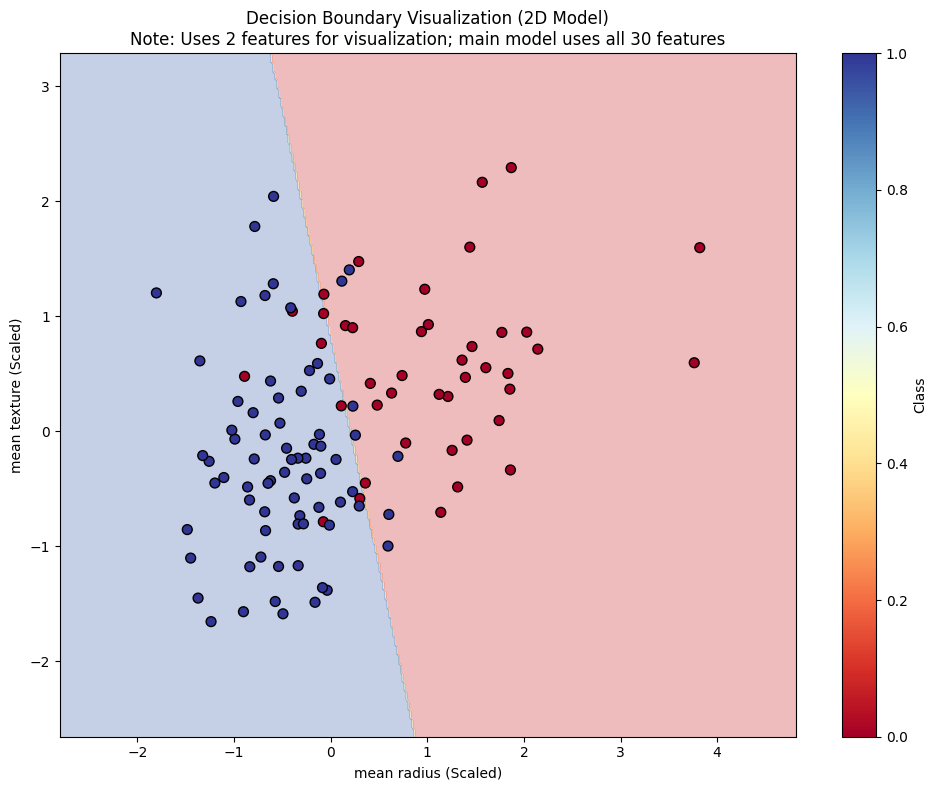


Example 1 Complete! ✓
اكتمل المثال 1! ✓


In [72]:
# Plot decision boundary and test data
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
scatter = plt.scatter(X_2d_test_scaled[:, 0], X_2d_test_scaled[:, 1],
                     c=y_test_2d, cmap='RdYlBu', edgecolors='black', s=50)
plt.colorbar(scatter, label='Class')
plt.xlabel(f'{feature_1_name} (Scaled)')
plt.ylabel(f'{feature_2_name} (Scaled)')
plt.title('Decision Boundary Visualization (2D Model)\nNote: Uses 2 features for visualization; main model uses all 30 features')
plt.tight_layout()
plt.savefig('decision_boundary.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'decision_boundary.png'")
print("\n💡 Note: This visualization shows the decision boundary using only 2 features")
print("   The main model uses all 30 features and performs better!")
plt.show()
print("\n" + "=" * 60)
print("Example 1 Complete! ✓")
print("اكتمل المثال 1! ✓")
print("=" * 60)